# Case Enem

**Problema:** como lidar com os NAs da coluna NU_NOTA_MT? se precisasse das notas desaparecidas dessa coluna, qual seria o tratamento?

**Observações:**
1. O número de matrícula é referente ao Enem 2016, trata-se de uma máscara e não o seu número de inscrição original no Enem. O mesmo NU_INSCRICAO para anos diferentes não identifica o mesmo participante no exame, não permite o acesso aos dados cadastrais como nome, endereço, RG etc, nem identifica o mesmo participante em microdados de pesquisas diferentes.
2. A idade é referente à idade do inscrito em 31/12/2016. Idades inferiores a 10 anos e superiores a 100 anos estão com o campo vazio na base.

In [1]:
# importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# ler as bases de dados

dicionario_colunas = pd.read_excel('dicionario_colunas_enem_alterado.xlsx')
base_enem = pd.read_excel('enem.xlsx')

## checagens e tratamento das bases

In [3]:
# checar o número de linhas e de colunas de cada dataframe

pd.DataFrame({
    'base': ['base_enem', 'dicionario_colunas'],
    'n_colunas': [len(base_enem.columns), len(dicionario_colunas.columns)],
    'n_linhas': [len(base_enem), len(dicionario_colunas)]
})

,base,n_colunas,n_linhas
0,base_enem,29,18306
1,dicionario_colunas,7,130


In [4]:
# verificar a base de dados dicionario_colunas

dicionario_colunas.head()

,variavel,descricao_variavel,categoria,descricao_categoria,n_caracteres,tipo_variavel,tipo_dado
0,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica,participante
1,SG_UF_RESIDENCIA,Sigla da Unidade da Federação de residência,NaN,NaN,2,Alfanumérica,participante
2,NU_IDADE,Idade2,NaN,NaN,3,Numérica,participante
3,TP_SEXO,Sexo,M,Masculino,1,Alfanumérica,participante
4,TP_SEXO,Sexo,F,Feminino,1,Alfanumérica,participante


In [5]:
# verificar a base de dados do enem

base_enem.head(10)

,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,c4b29f22e75f5d4d83c329396a979ae24c1d295e,PA,27,M,3,1,1,10,1,NaN,...,1.0,760.0,C,G,H,B,A,C,F,D
1,db4da599aab5bb08dce27094a35fd3e36cd0abce,RN,31,F,1,1,1,10,1,NaN,...,NaN,NaN,E,E,C,A,A,B,E,A
2,4f88ee99c3603ec290163657c4de78f6446ec155,CE,24,F,4,1,1,6,1,NaN,...,NaN,NaN,B,B,C,A,A,B,F,A
3,1653a4b2843735e9649b54a57c6146d3c8c2a5a4,GO,17,F,1,1,2,0,2,1.0,...,1.0,580.0,H,D,D,C,B,C,D,A
4,be82fe3eb18eb2aa864fdf06c0bb45345fe3f4a0,MA,25,M,1,1,1,6,1,NaN,...,NaN,NaN,C,D,B,A,A,B,G,A
5,c12c623f3dbeedb27ac2221ac7fe16ec242c5c14,PR,17,M,3,2,2,0,2,1.0,...,1.0,460.0,B,D,C,B,A,A,NaN,A
6,9fa5581982f8076e7da74100bbef8990720f62ab,RJ,22,F,2,1,1,3,1,NaN,...,1.0,480.0,C,C,C,B,A,B,I,A
7,e02921b7ab053178f65d4989c7f488dea7c06516,TO,21,F,3,1,1,3,1,NaN,...,1.0,580.0,B,E,B,B,A,A,NaN,A
8,4496d0d42a729a789643e669e0f73b068777f1d7,MS,20,F,3,3,1,2,1,NaN,...,1.0,580.0,E,E,K,D,B,A,NaN,B
9,2dd6e3c28210e2d22f9225b1bbaf120fca5e0d9d,MG,17,F,1,1,2,0,2,1.0,...,1.0,600.0,D,D,B,A,A,A,NaN,A


In [6]:
# fazer o depara para saber o que significa cada coluna

get_dict = pd.DataFrame({
    'variavel': base_enem.columns.to_list()
})

get_dict = get_dict.merge(dicionario_colunas[['variavel', 'descricao_variavel']].drop_duplicates())

get_dict

,variavel,descricao_variavel
0,NU_INSCRICAO,Número de inscrição1
1,SG_UF_RESIDENCIA,Sigla da Unidade da Federação de residência
2,NU_IDADE,Idade2
3,TP_SEXO,Sexo
4,TP_COR_RACA,Cor/raça
5,TP_NACIONALIDADE,Nacionalidade
6,TP_ST_CONCLUSAO,Situação de conclusão do Ensino Médio
7,TP_ANO_CONCLUIU,Ano de Conclusão do Ensino Médio
8,TP_ESCOLA,Tipo de escola do Ensino Médio
9,TP_ENSINO,Tipo de instituição que concluiu ou concluirá ...


## análise exploratória

In [7]:
# o que significa a coluna a ser investigada?

dicionario_colunas[dicionario_colunas['variavel'] == 'NU_NOTA_MT']

,variavel,descricao_variavel,categoria,descricao_categoria,n_caracteres,tipo_variavel,tipo_dado
58,NU_NOTA_MT,Nota da prova de Matemática,NaN,NaN,9,Numérica,prova objetiva


### verificação de NAs

<AxesSubplot:>

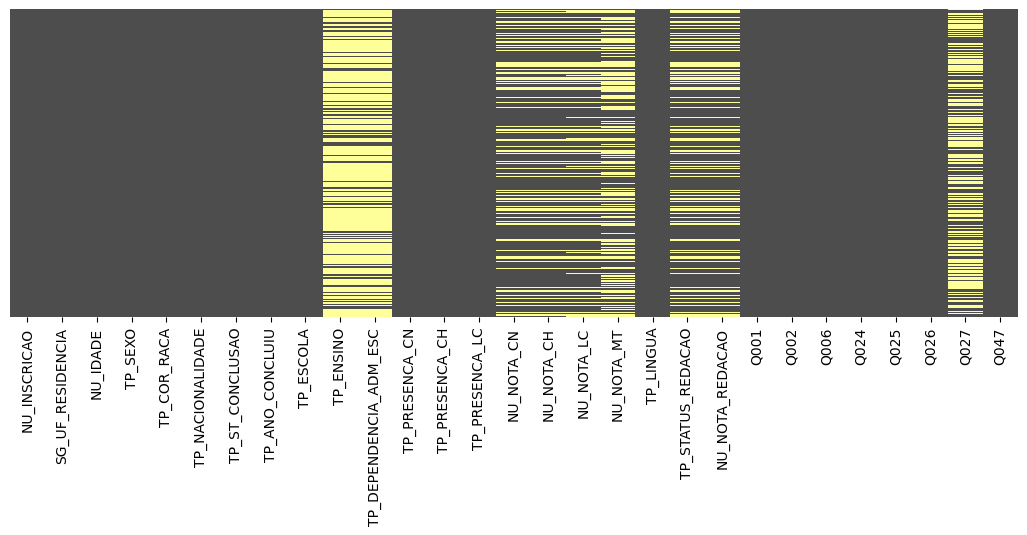

In [8]:
# verificarquais são os NAs das linhas na base_enem

plt.figure(figsize = (13,4))
sns.heatmap(base_enem.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

aparentemente a coluna da nota de matemática tem mais valores vazios do que as colunas das notas das outras áreas de conhecimento.

em 2016, as provas de cada área do conhecimento foram divididas nos seguintes dias:
- sábado: ciências humanas (CH) + ciências da natureza (CN)
- domingo: matemática (MT) + linguagens e códigos (LC) + Redação

dessa forma, faz sentido que as observações vazias para CN sejam as mesmas do que para CH.

também faz sentido que algumas notas vazias de LC não estejam vazias para CN e CH, pois como esta prova foi em outro dia, algumas pessoas podem não ter comparecido.

no entanto, não faz sentido que tenham muito mais notas vazias de matemática que não estão vazias em LC, uma vez que estas foram realizadas no mesmo dia; caso a pessoa não tenha marcado as questões da prova por exemplo, a nota dela deveria estar como 0.

os NAs da redação batem com os de LC

In [10]:
# quais as notas de LC das pessoas que estão com valor nulo de matemática mas não nulos na de português?

nota_lc_na_mt = base_enem
nota_lc_na_mt['sem_nota_mat'] = nota_lc_na_mt['NU_NOTA_MT'].isnull()
nota_lc_na_mt['sem_nota_lc'] = nota_lc_na_mt['NU_NOTA_LC'].isnull()

nota_lc_na_mt = nota_lc_na_mt[nota_lc_na_mt['sem_nota_mat'] == True]
nota_lc_na_mt = nota_lc_na_mt[nota_lc_na_mt['sem_nota_lc'] == False]
nota_lc_na_mt['NU_NOTA_LC'].sort_values()

5343       0.0
7063       0.0
16487    343.7
6890     346.3
8086     348.2
         ...  
2376     688.2
3664     697.1
14398    698.7
8293     706.7
12489    708.9
Name: NU_NOTA_LC, Length: 3377, dtype: float64

In [11]:
# as pessoas com nota em pt mas não em matemática não tiraram 0 (exceto 2)

# o que significam as colunas que possuem muitos valores vazios?

print('TP_ENSINO =', get_dict[get_dict['variavel'] == 'TP_ENSINO']['descricao_variavel'].to_list())
print('TP_DEPENDENCIA_ADM_ESC =', get_dict[get_dict['variavel'] == 'TP_DEPENDENCIA_ADM_ESC']['descricao_variavel'].to_list())
print('Q027 =', get_dict[get_dict['variavel'] == 'Q027']['descricao_variavel'].to_list())

TP_ENSINO = ['Tipo de instituição que concluiu ou concluirá o Ensino Médio ']
TP_DEPENDENCIA_ADM_ESC = ['Dependência administrativa (Escola)']
Q027 = ['Com que idade você começou a exercer uma atividade remunerada?']


In [12]:
# tem pessoas que estão com presença 1 para CH e 0 para CN e vice versa?

base_enem.groupby(['TP_PRESENCA_CH', 'TP_PRESENCA_CN']).count()['NU_INSCRICAO'].to_frame()

,,NU_INSCRICAO
TP_PRESENCA_CH,TP_PRESENCA_CN,
0,0,4514
1,1,13783
2,2,9


In [13]:
# a mesma resposta de presença para CH é a de presença para CN para todos os candidatos

# o que significa presença 2?

dicionario_colunas[(dicionario_colunas['variavel'] == 'TP_PRESENCA_CH')][['categoria', 'descricao_categoria']]

,categoria,descricao_categoria
46,0,Faltou à prova
47,1,Presente na prova
48,2,Eliminado na prova


In [14]:
# as pessoas que estão sem nota de CH são as mesmas que não compareceram?

check_nota_ausencia = base_enem
check_nota_ausencia['sem_nota'] = check_nota_ausencia['NU_NOTA_CH'].isnull()

check_nota_ausencia.groupby(['sem_nota', 'TP_PRESENCA_CH']).count()['NU_INSCRICAO'].to_frame().reset_index()

,sem_nota,TP_PRESENCA_CH,NU_INSCRICAO
0,False,1,13783
1,True,0,4514
2,True,2,9


In [15]:
# só quem não compareceu está sem nota
# fazer a mesma conferência para português

check_nota_ausencia['sem_nota_lc'] = check_nota_ausencia['NU_NOTA_LC'].isnull()

check_nota_ausencia.groupby(['sem_nota_lc', 'TP_PRESENCA_LC']).count()['NU_INSCRICAO'].to_frame().reset_index()

,sem_nota_lc,TP_PRESENCA_LC,NU_INSCRICAO
0,False,1,13510
1,True,0,4787
2,True,2,9


In [16]:
# o mesmo foi confirmado para LC

# qual o percentual de pessoas que estão sem a nota de matemática e de português?

print('percentual sem nota de matemática =', round( base_enem['NU_NOTA_MT'].isnull().sum() * 100/ base_enem['NU_INSCRICAO'].count(), 1), '%')
print('percentual sem nota de portugues =', round(base_enem['NU_NOTA_LC'].isnull().sum() * 100/ base_enem['NU_INSCRICAO'].count(), 1), '%')

percentual sem nota de matemática = 44.6 %
percentual sem nota de portugues = 26.2 %


In [17]:
# só de curiosidade: quais os tipos de situação da redação?

status_redacao = dicionario_colunas[dicionario_colunas['variavel'] == 'TP_STATUS_REDACAO'][['categoria', 'descricao_categoria']]

status_redacao['categoria'] = status_redacao['categoria'].astype(float)

base_enem.groupby('TP_STATUS_REDACAO').count()['NU_INSCRICAO'].to_frame().reset_index().merge(status_redacao, left_on = 'TP_STATUS_REDACAO', right_on = 'categoria')

,TP_STATUS_REDACAO,NU_INSCRICAO,categoria,descricao_categoria
0,1.0,13195,1.0,Sem problemas
1,2.0,3,2.0,Anulada
2,3.0,17,3.0,Cópia Texto Motivador
3,4.0,133,4.0,Em Branco
4,5.0,9,5.0,Fere Direitos Humanos
5,6.0,105,6.0,Fuga ao tema
6,7.0,7,7.0,Não atendimento ao tipo
7,8.0,12,8.0,Texto insuficiente
8,9.0,29,9.0,Parte desconectada


### de quais variáveis verificar a distribuição?

olhar a distribuição: 
- de inscritos
- comparar o perfil de quem foi e de quem não foi no primeiro dia
- comparar o perfil de quem foi e de quem não foi no segundo dia
- observar o perfil de quem tem não tem a nota de matemática mas tem a de português

In [18]:
# criar a coluna se tem ou não a nota de matemática

base_enem['tem_nota_mat'] = base_enem['NU_NOTA_MT'].isnull()

In [19]:
# olhar novamente o que significa cada variável e selecionar as que fazem sentido

get_dict

,variavel,descricao_variavel
0,NU_INSCRICAO,Número de inscrição1
1,SG_UF_RESIDENCIA,Sigla da Unidade da Federação de residência
2,NU_IDADE,Idade2
3,TP_SEXO,Sexo
4,TP_COR_RACA,Cor/raça
5,TP_NACIONALIDADE,Nacionalidade
6,TP_ST_CONCLUSAO,Situação de conclusão do Ensino Médio
7,TP_ANO_CONCLUIU,Ano de Conclusão do Ensino Médio
8,TP_ESCOLA,Tipo de escola do Ensino Médio
9,TP_ENSINO,Tipo de instituição que concluiu ou concluirá ...


como visto anteriormente TP_ENSINO e TP_DEPENDENCIA_ADM_ESC possuem muitos valores vazios

tendo isto em vista, as variáveis a terem a distribuição analisada são:

SG_UF_RESIDENCIA, NU_IDADE, TP_SEXO, TP_COR_RACA, TP_NACIONALIDADE, TP_ST_CONCLUSAO, TP_ESCOLA

In [20]:
# quais os tipos de escola?

dicionario_colunas[dicionario_colunas['variavel'] == 'TP_ESCOLA']

,variavel,descricao_variavel,categoria,descricao_categoria,n_caracteres,tipo_variavel,tipo_dado
32,TP_ESCOLA,Tipo de escola do Ensino Médio,1,Não Respondeu,1,Numérica,participante
33,TP_ESCOLA,Tipo de escola do Ensino Médio,2,Pública,1,Numérica,participante
34,TP_ESCOLA,Tipo de escola do Ensino Médio,3,Privada,1,Numérica,participante
35,TP_ESCOLA,Tipo de escola do Ensino Médio,4,Exterior,1,Numérica,participante


### distribuição de estados

<AxesSubplot:>

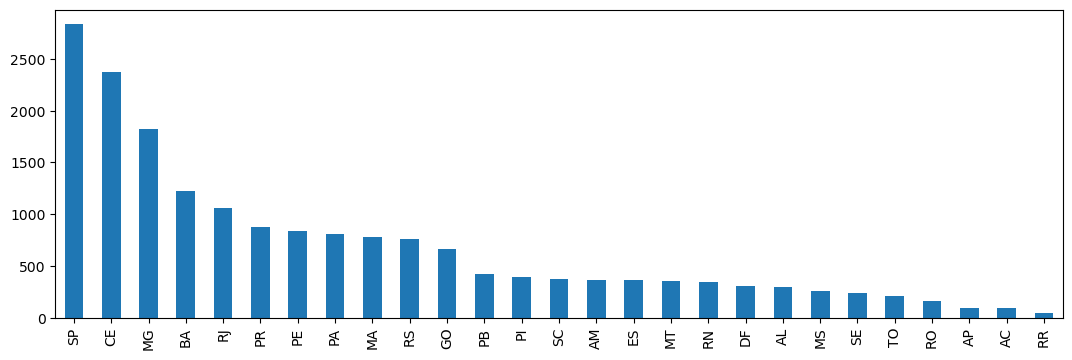

In [21]:
plt.figure(figsize = (13,4))
base_enem['SG_UF_RESIDENCIA'].value_counts().plot.bar()

por que tem tanta gente assim do Ceará? A base está enviesada? ela é representativa dos inscritos reais do enem 2016?

[inscritos por estado no enem 2016](https://blogs.interior.ne10.uol.com.br/intensivao/2016/10/13/pernambuco-e-o-sexto-estado-com-mais-inscritos-no-enem-2016/)

olhando para a lista, Ceará foi o 5º estado com mais inscritos no Enem de 2016, e na base tem proporcionalmente muito mais pessoas do Ceará

rank | top inscritos real | top inscritos base | top estados mais populosos
--- | --- | --- | ---
1 | SP | SP | SP
2 | MG | CE 🔺 | MG
3 | BA | MG  | RJ
4 | RJ | BA | BA
5 | CE 🔸 | RJ | RS
6 | PE | PR 🔺 | PR
7 | PA | PE | PE
8 | RS | PA | CE
9 | PR 🔸 | MA 🔺 | PA 
10 | MA 🔸 | RS | MA

teria que olhar certinha a proporção de cada estado para ver o quanto a base está enviesada

olhando para o ranking de estados mais populosos, há uma tendência de que, olhando proporcionalmente dentro dos estados, mais pessoas do nordeste se inscrevam do que as pessoas do sul 

se fosse este um ponto, teria que ver a distribuição de faixas etárias dentro de cada estado 

### distribuição de idade

In [22]:
# verificando o tipo da variável de idade

type(base_enem['NU_IDADE'].iloc[0])

numpy.int64

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

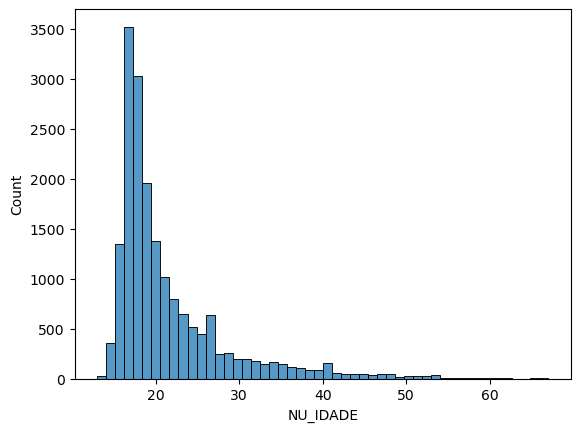

In [26]:
# a idade é um número inteiro
# olhando a distribuição:

sns.histplot(x = 'NU_IDADE', data = base_enem, bins = 50)

<AxesSubplot:xlabel='idade_cat', ylabel='NU_IDADE'>

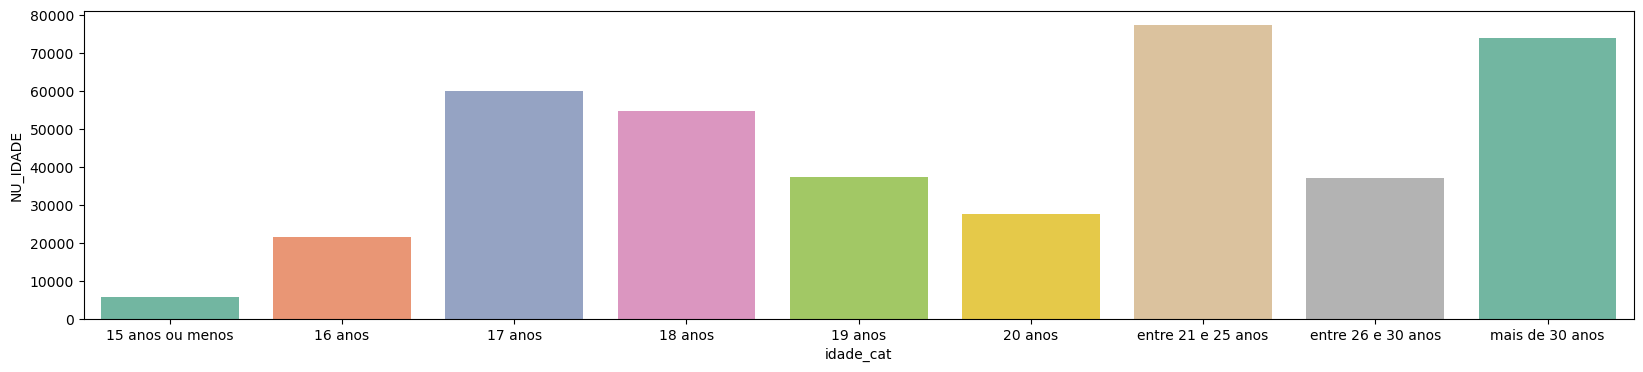

In [27]:
# categorizando a idade

def idade_cat(x):
    if x <= 15:
        return "15 anos ou menos"
    elif x == 16:
        return "16 anos"
    elif x == 17:
        return "17 anos"
    elif x == 18:
        return "18 anos"
    elif x == 19:
        return "19 anos"
    elif x == 20:
        return "20 anos"
    elif x <= 25:
        return "entre 21 e 25 anos"
    elif x <= 30:
        return "entre 26 e 30 anos"
    else:
        return "mais de 30 anos"

# aplicando a função na base_enem
base_enem['idade_cat'] = base_enem['NU_IDADE'].apply(idade_cat)

# plotando o gráfico da distribuição das idades categóricas
df_idade_cat = base_enem.groupby('idade_cat').sum()['NU_IDADE'].to_frame().reset_index()
plt.figure(figsize = (20, 4))
sns.barplot(data = df_idade_cat, x = 'idade_cat', y = 'NU_IDADE', palette = 'Set2')

### distribuição de sexo

In [51]:
sexo = base_enem['TP_SEXO'].value_counts().to_frame()
sexo['perc'] = base_enem['TP_SEXO'] * 100 / len(base_enem)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

TypeError: Neither the `x` nor `y` variable appears to be numeric.

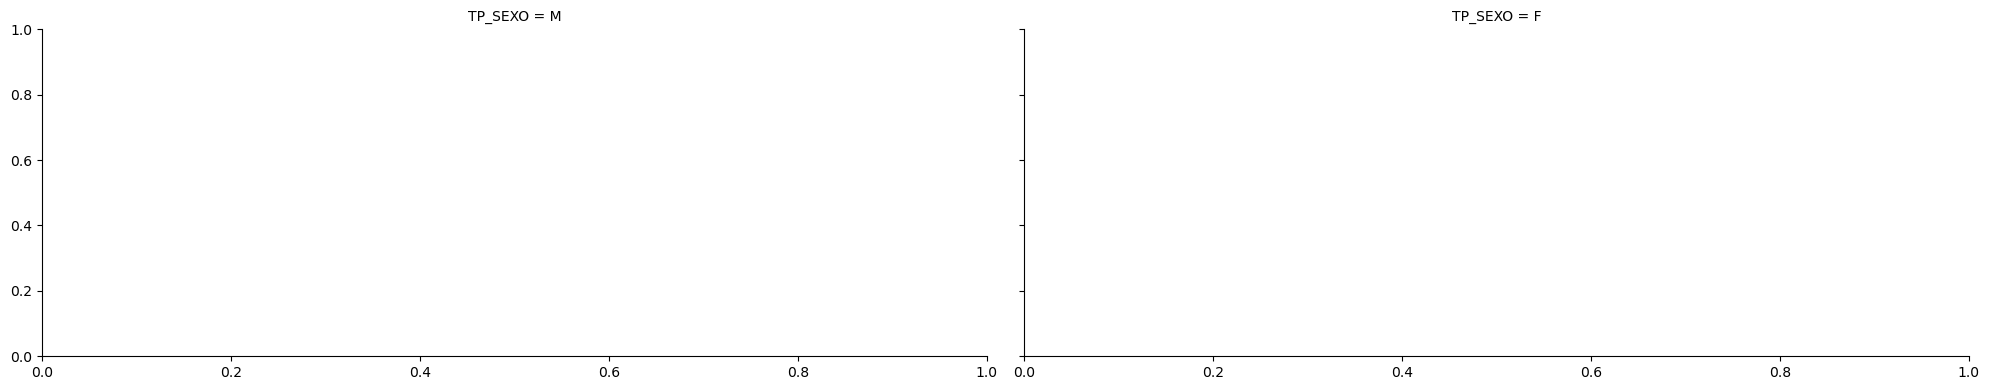

In [50]:
sexo_idade = base_enem.groupby(['TP_SEXO', 'idade_cat']).value_counts()

g = sns.FacetGrid(data = base_enem, col = "TP_SEXO", height = 4, aspect = 2.5)
g.map(sns.barplot, x = "idade_cat")

### distribuição de raça/cor

In [ ]:
TP_COR_RACA

### distribuição de nacionalidade

In [ ]:
TP_NACIONALIDADE

### distribuição da situação de conclusão do ensino médio

In [ ]:
SITUACAO_CONCLUSÃO

### análise das respostas do questionário socioeconômico

In [23]:
get_dict[get_dict['variavel'].str.startswith('Q')]

,variavel,descricao_variavel
21,Q001,"Até que série seu pai, ou o homem responsável ..."
22,Q002,"Até que série sua mãe, ou a mulher responsável..."
23,Q006,Qual é a renda mensal de sua família? (Some a ...
24,Q024,Na sua residência tem computador?
25,Q026,Você exerce ou já exerceu atividade remunerada?
26,Q027,Com que idade você começou a exercer uma ativi...
27,Q047,Em que tipo de escola você frequentou o Ensino...
